In [1]:
import os
import sys
import json
import pickle
import matplotlib.pyplot as plt

# Switch to parent path to import local module
parent_path = str(os.getcwd()).split('notebooks')[0] # zeosyn_gen
os.chdir(parent_path)
print('Switched directory to:', os.getcwd())

import data.utils as utils
sys.modules['utils'] = utils # Way to get around relative imports in utils for ZeoSynGen_dataset # https://stackoverflow.com/questions/2121874/python-pickling-after-changing-a-modules-directory
from eval import load_model, get_prediction_and_ground_truths, eval_zeolite_aggregated, eval_zeolite_osda, eval_single_system, get_metric_dataframes
from data.metrics import maximum_mean_discrepancy, wasserstein_distance

Switched directory to: /home/jupyter/Elton/Zeolites/zeosyn_gen


/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics_eq/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics_eq/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_type = 'cvae' # 'cvae'
fname = 'v10'
split = 'system'

In [3]:
# Load configs
with open(f'runs/{model_type}/{split}/{fname}/configs.json') as f:
    configs = json.load(f)
with open(f"runs/{model_type}/{split}/{fname}/train_loss_list.pkl", 'rb') as f: # load dataset
    train_loss_list = pickle.load(f)
with open(f"runs/{model_type}/{split}/{fname}/recons_loss_list.pkl", 'rb') as f: # load dataset
    recons_loss_list = pickle.load(f)
with open(f"runs/{model_type}/{split}/{fname}/kld_loss_list.pkl", 'rb') as f: # load dataset
    kld_loss_list = pickle.load(f)
with open(f"runs/{model_type}/{split}/{fname}/val_loss_list.pkl", 'rb') as f: # load dataset
    val_loss_list = pickle.load(f)

/tmp/ipykernel_870182/1524880275.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,1.1*train_loss_list[0])


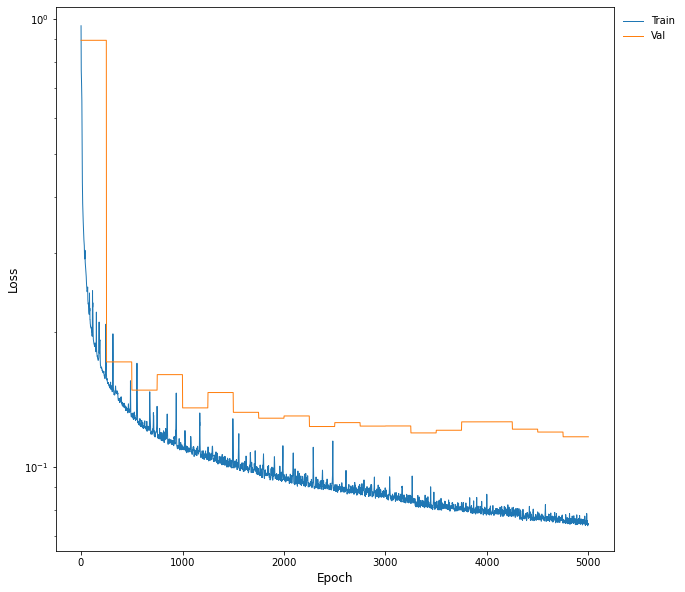

In [4]:
# Train/val loss fig
plt.figure(figsize=(10,10))
plt.plot(range(len(train_loss_list)), train_loss_list, label = 'Train')
plt.plot(range(len(val_loss_list)), val_loss_list, label = 'Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.ylim(0,1.1*train_loss_list[0])
plt.show()

In [5]:
# Get predictions and ground truths
model, configs = load_model(model_type, fname, split)
syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset = get_prediction_and_ground_truths(model, configs)
mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df = get_metric_dataframes(configs)

Loading model and configs...
Getting model predictions and grouth truths...
SYSTEMS:
train+val: 1856 test: 464

n_datapoints:
train: 14749 val: 2107 test: 5168
Loading synthetic predictions from saved predictions...


# 1) Overall aggregated

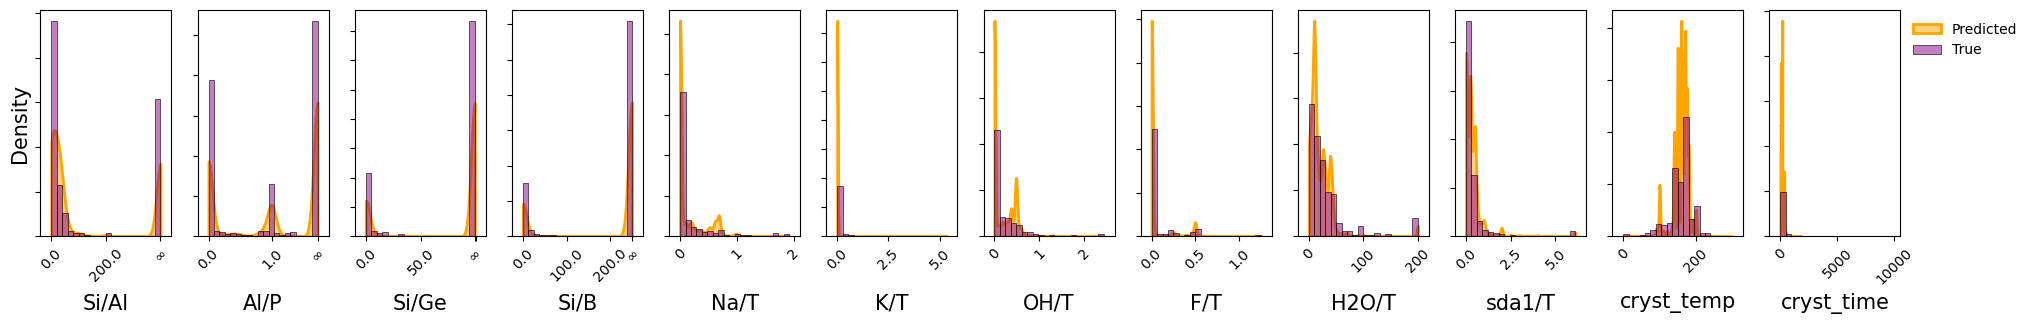

In [6]:
utils.compare_gel_conds([syn_pred, syn_true], ['Predicted', 'True'], [True, False], [False, True], ['orange', 'darkmagenta'], common_norm=True, alpha=0.5)

# 2) System-splits

### A) Zeolite-aggregated systems

Calculating metrics for zeolite-aggregated systems...
CHA
MMD: 0.49022769927978516
WSD: 0.20498601475307446


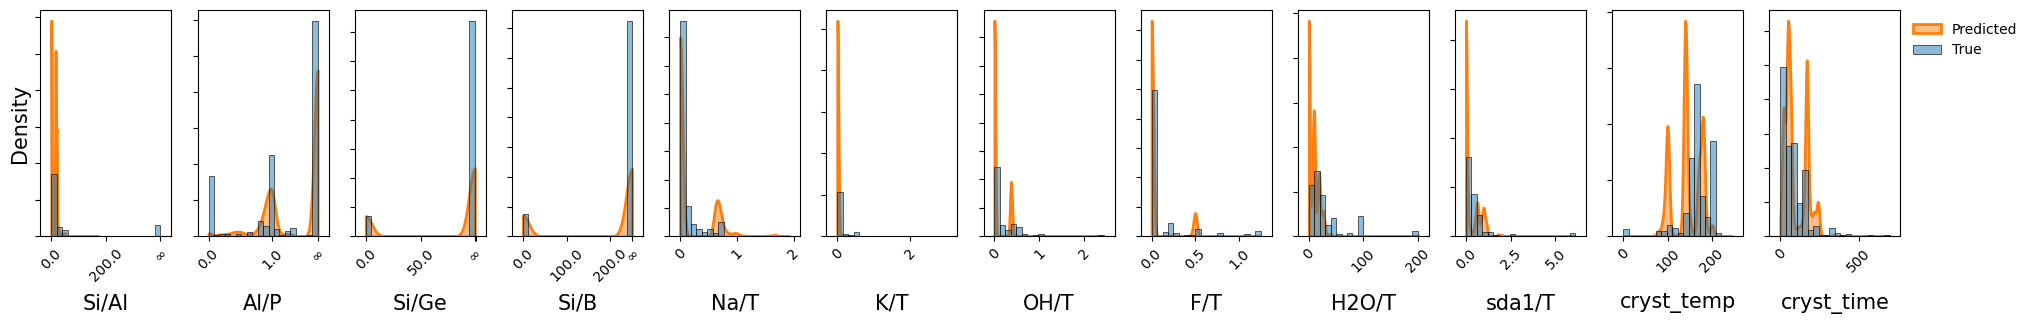

AEL
MMD: 0.4718341827392578
WSD: 0.10516241825226386


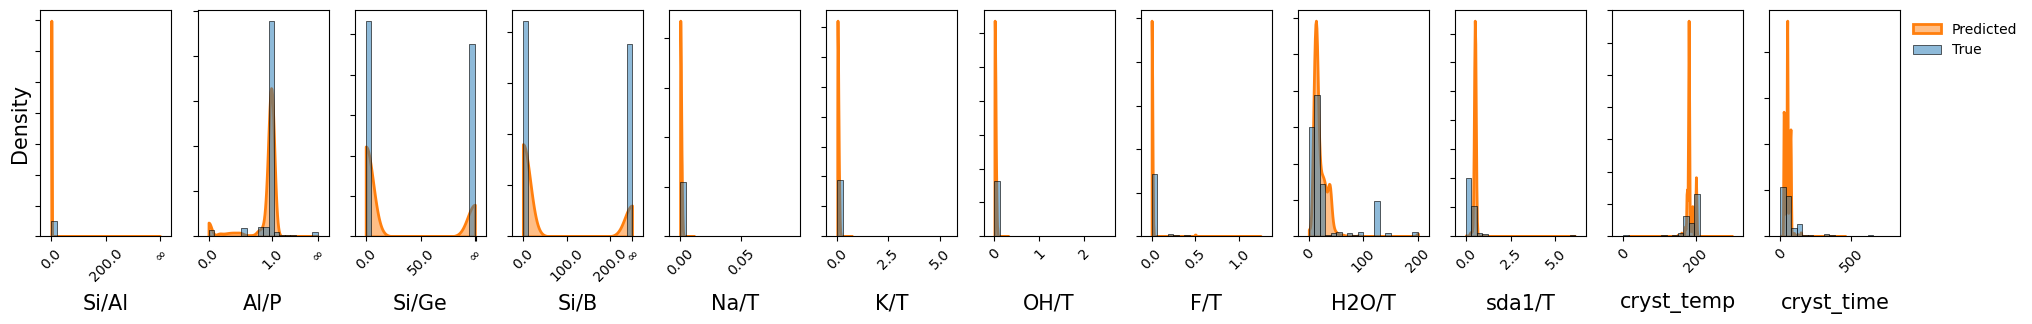

MFI
MMD: 0.20110321044921875
WSD: 0.053499027848390904


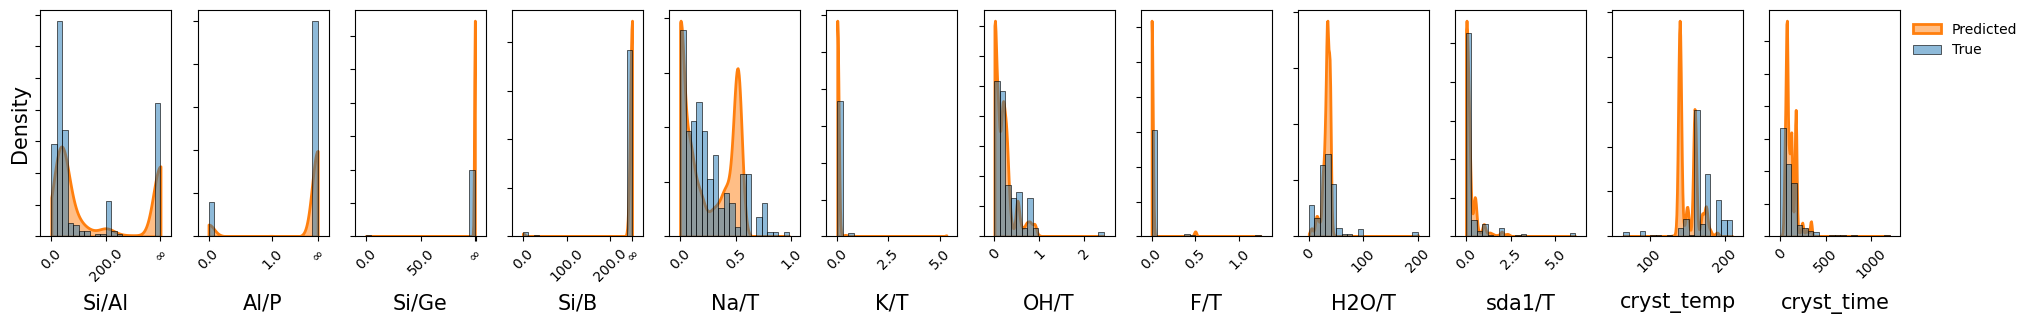

LTA
MMD: 0.32953691482543945
WSD: 0.06959250324997718


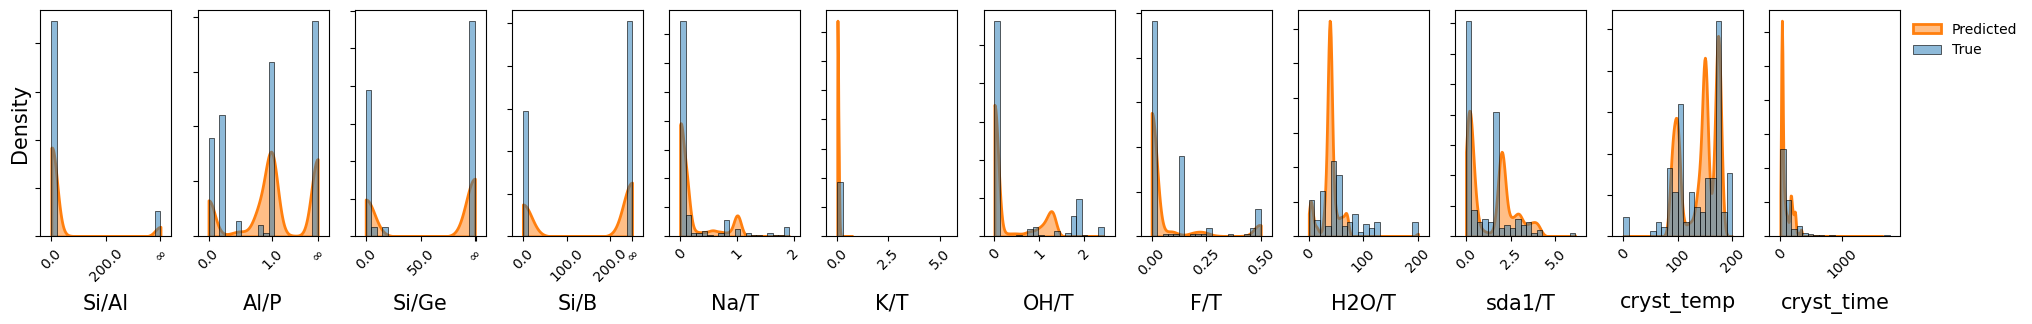

AFI
MMD: 0.0966787338256836
WSD: 0.022917903577244523


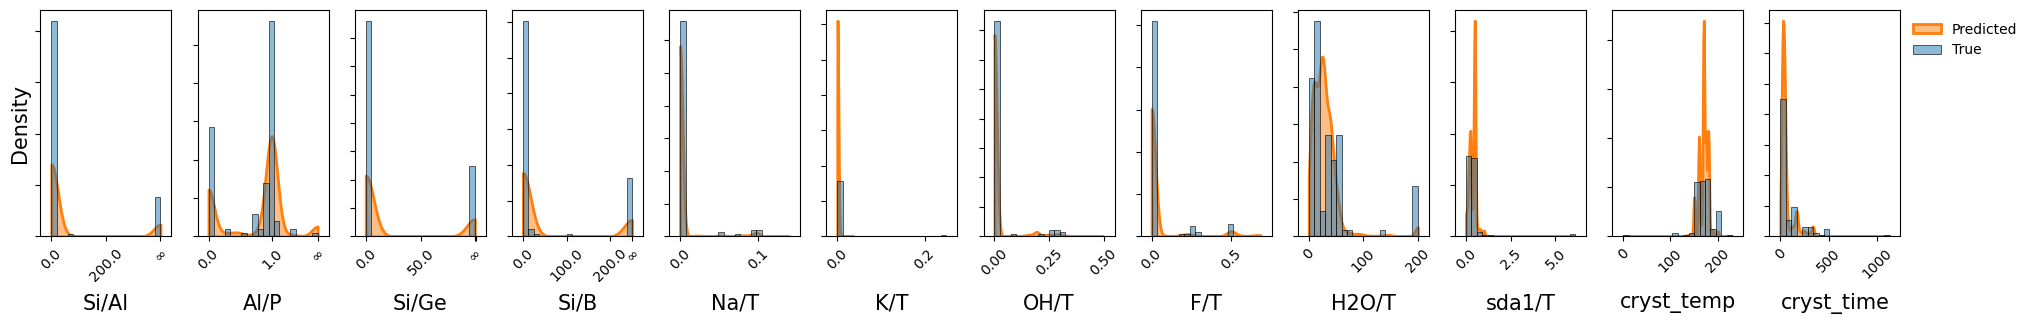

IWR
MMD: 0.9514346122741699
WSD: 0.394469225964524


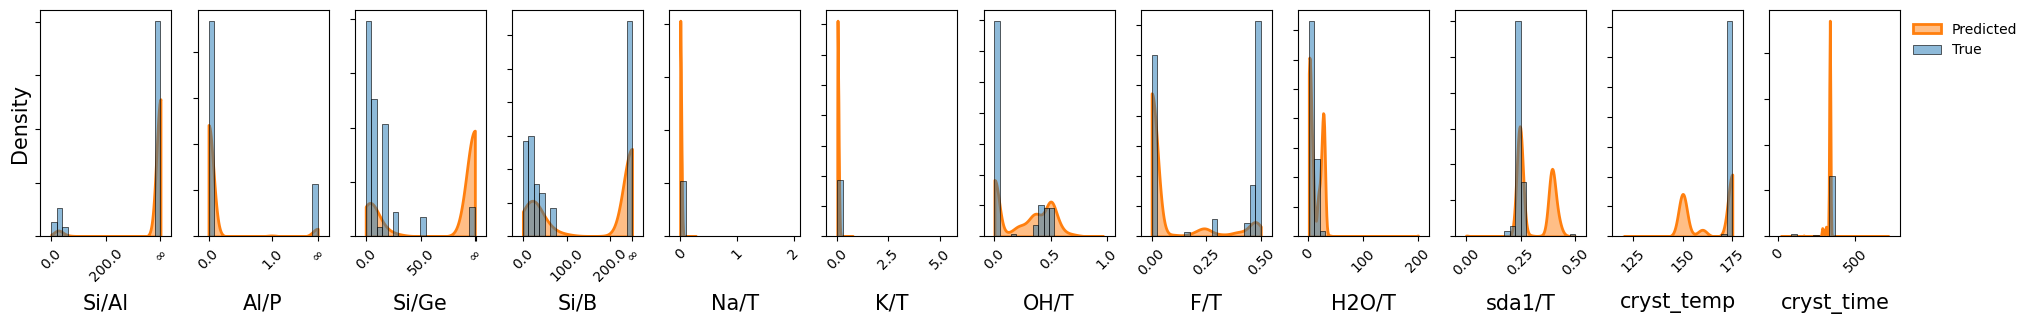

BEA
MMD: 0.026147842407226562
WSD: 0.028602939485799325


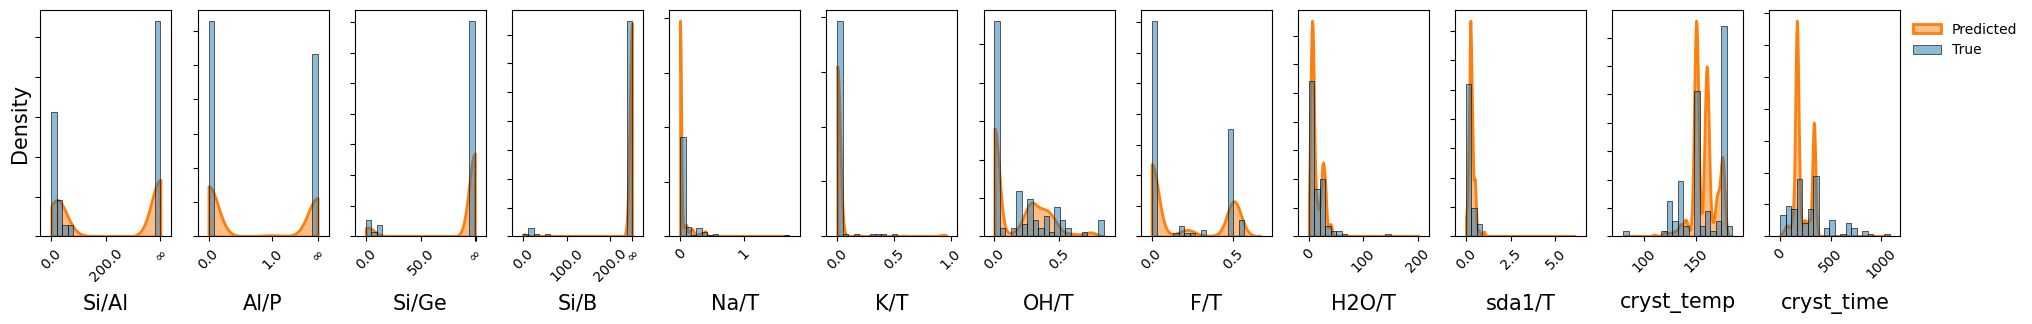

MTW
MMD: 0.09032726287841797
WSD: 0.04366130032350604


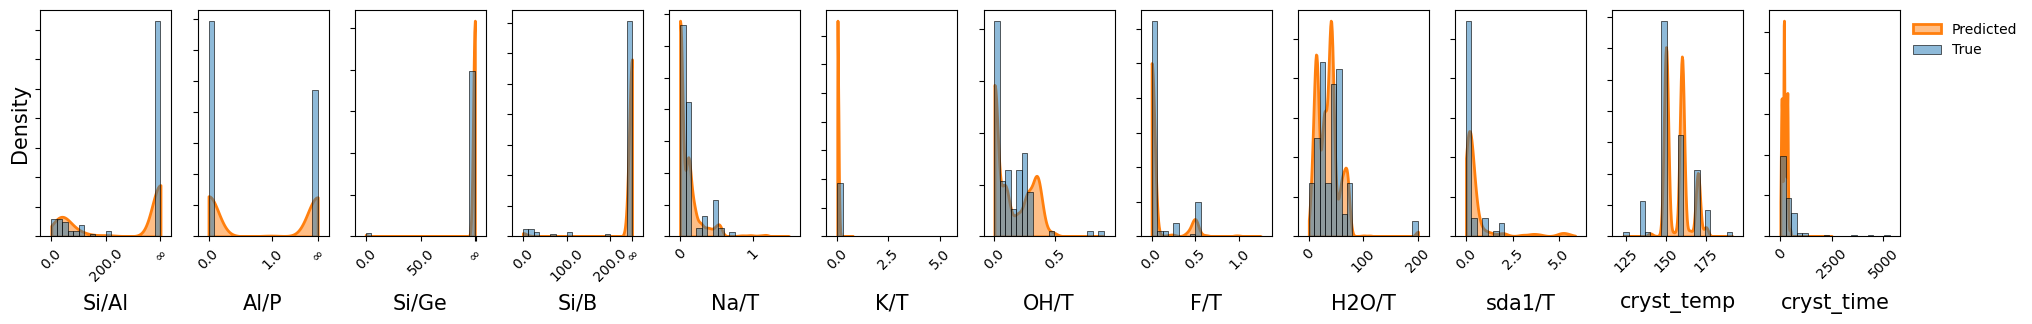

MEL
MMD: 0.5282268524169922
WSD: 0.08902619047897359


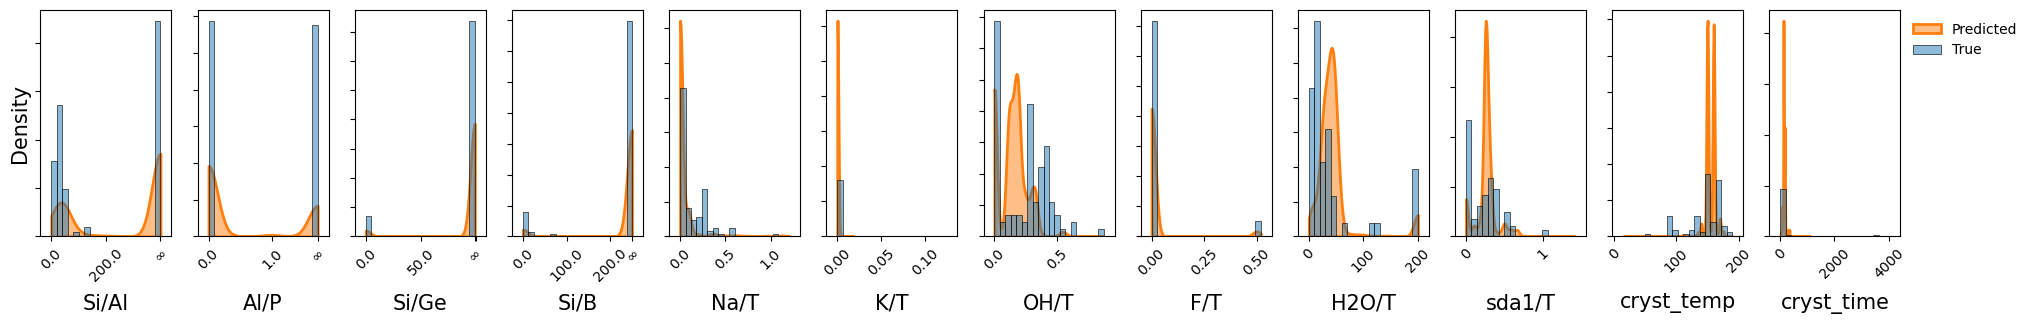

LEV
MMD: 0.09764957427978516
WSD: 0.022571464387033755


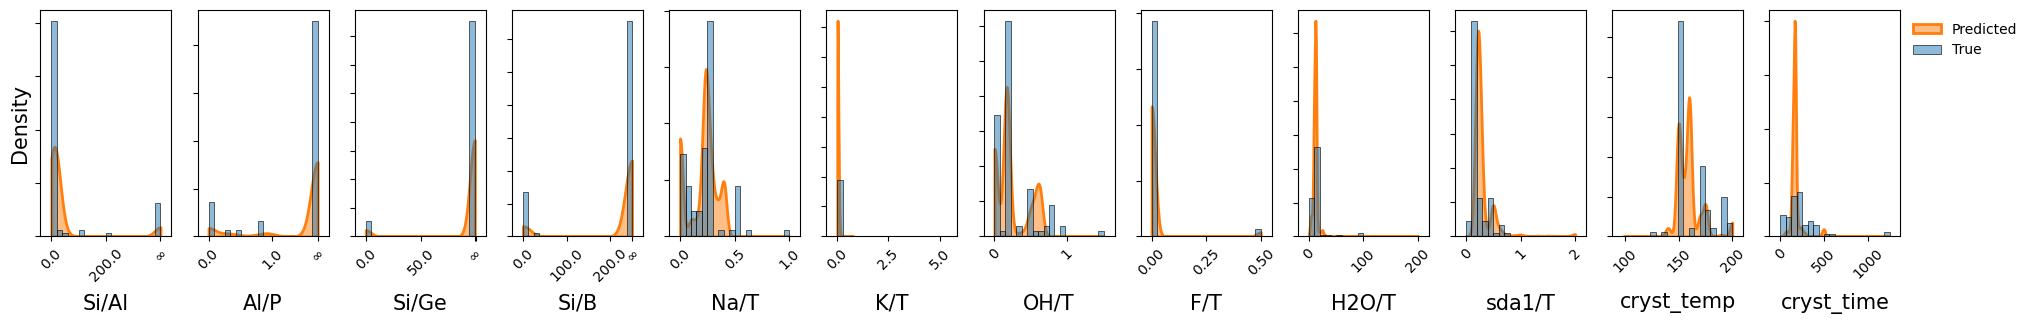

Mean MMD: 0.32831668853759766
Mean WSD: 0.10344889883207878


In [7]:
_, _ = eval_zeolite_aggregated(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs, eval=True, plot=True, print_metrics=True, num_systems=10)

SAV
MMD: 0.5379724502563477
WSD: 0.0406647382979758


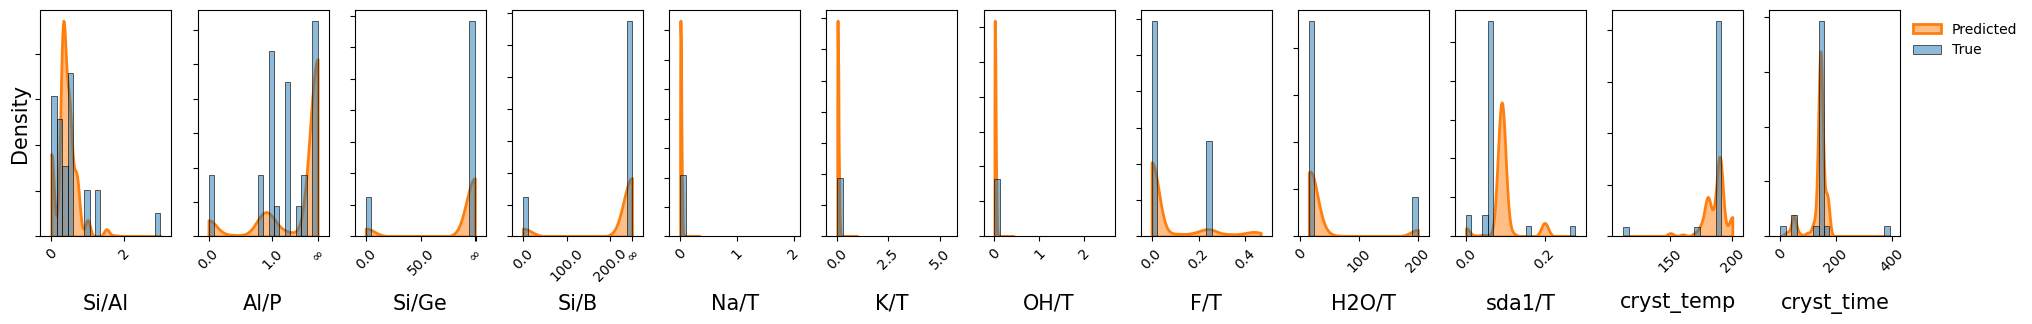

In [8]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='SAV')

BEC
MMD: 0.2216138839721679
WSD: 0.1437506065964757


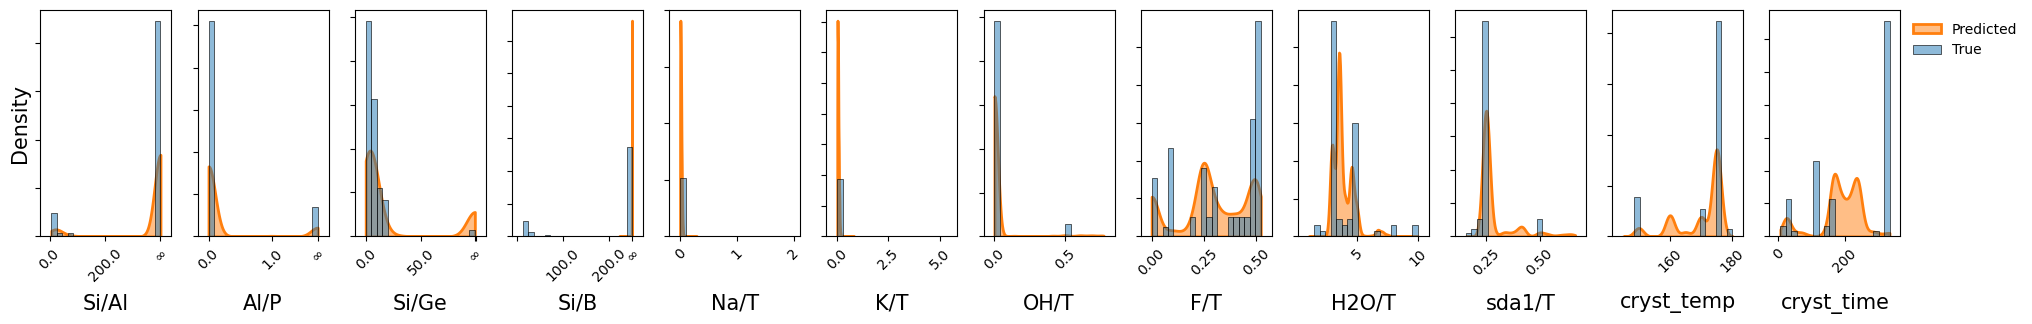

In [9]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='BEC')

### B) Zeolite-OSDA system

Calculating metrics for zeolite-OSDA systems...
CHA C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 2.127695083618164
WSD: 0.4150788964477474


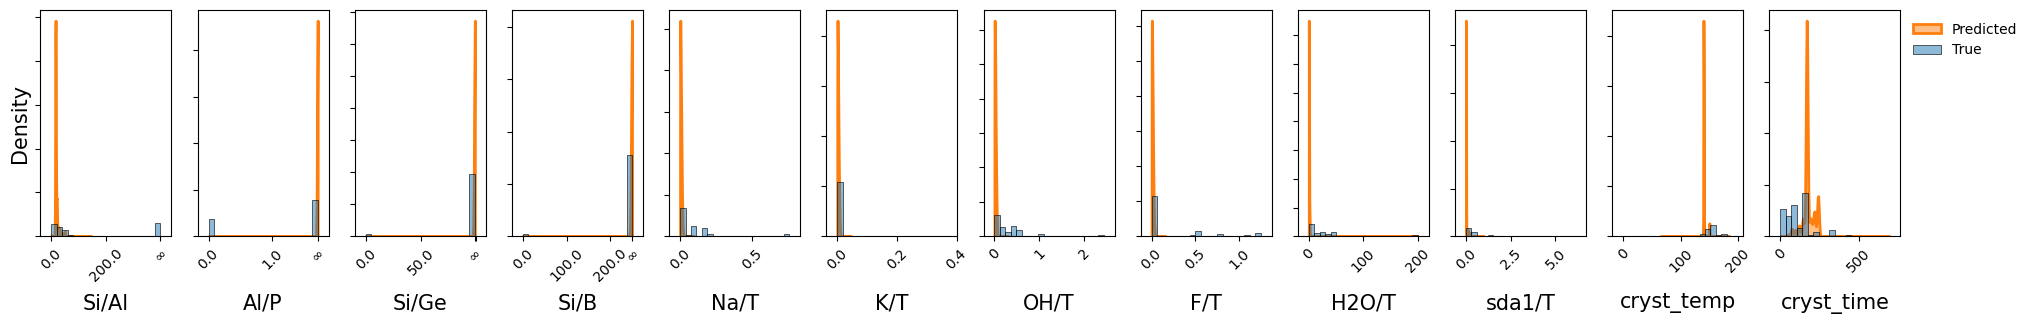

AEL CCCNCCC
MMD: 0.5269622802734375
WSD: 0.1188312776704761


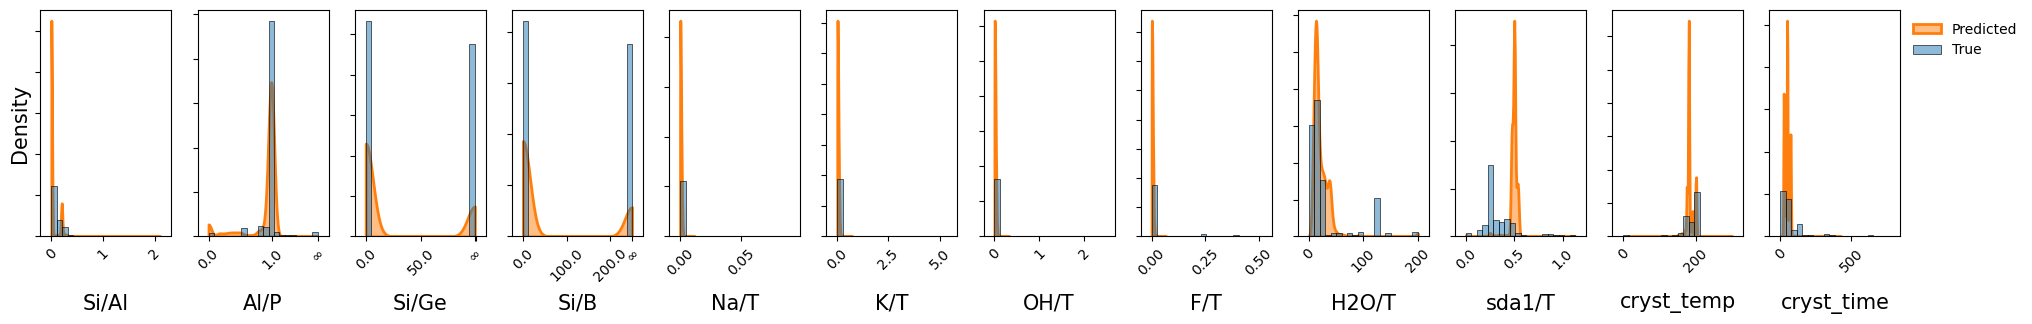

CHA OSDA-free
MMD: 1.8066606521606445
WSD: 0.12400320913478799


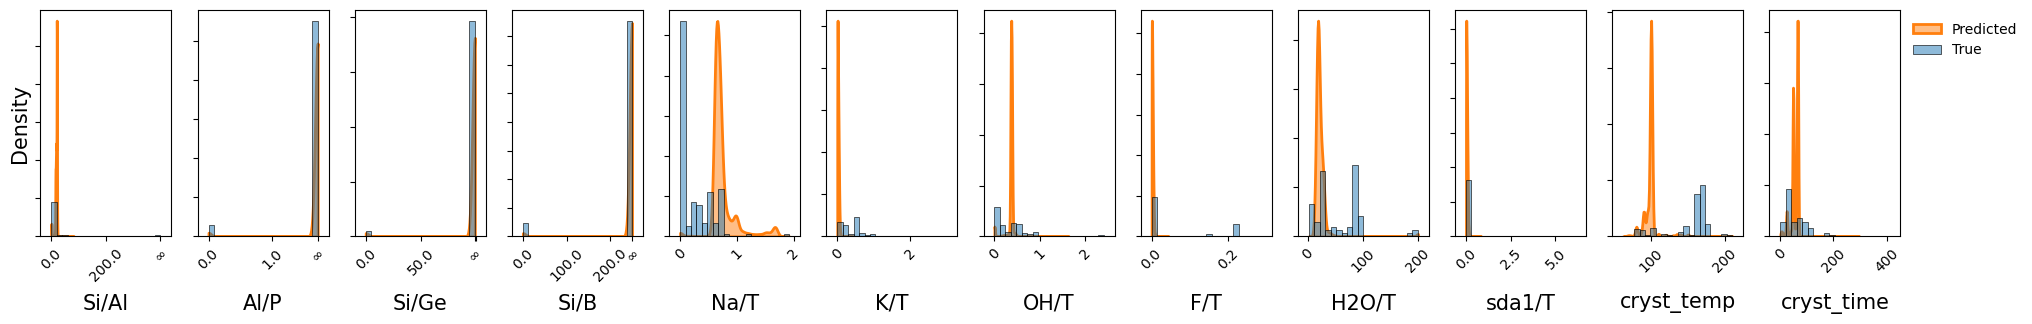

MFI OSDA-free
MMD: 0.5770578384399414
WSD: 0.08473885007860787


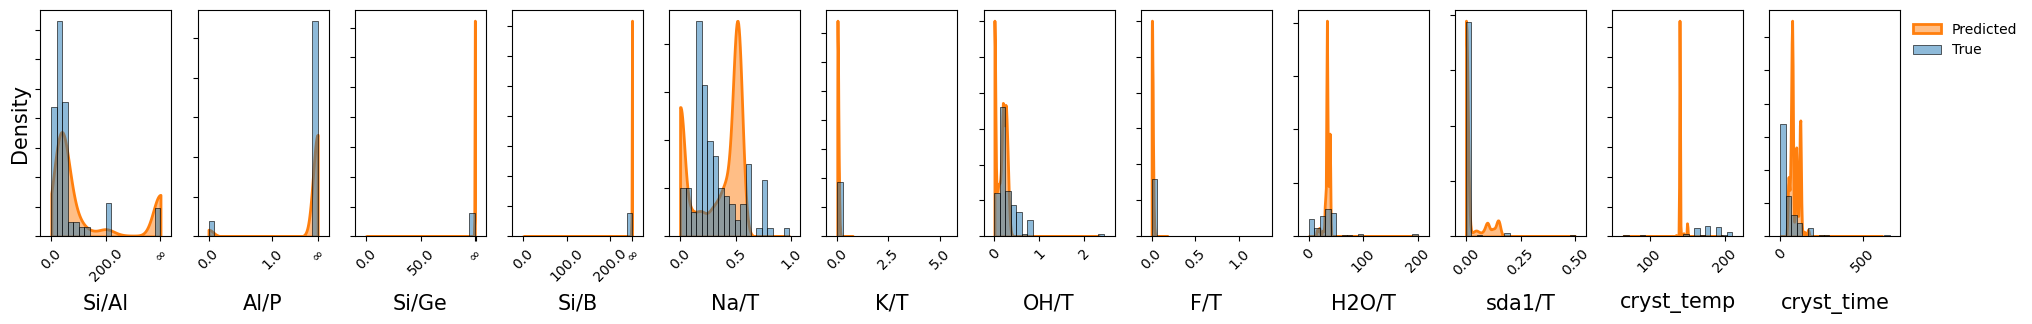

CHA CCN(CC)CC
MMD: 1.1002464294433594
WSD: 0.27358316183312337


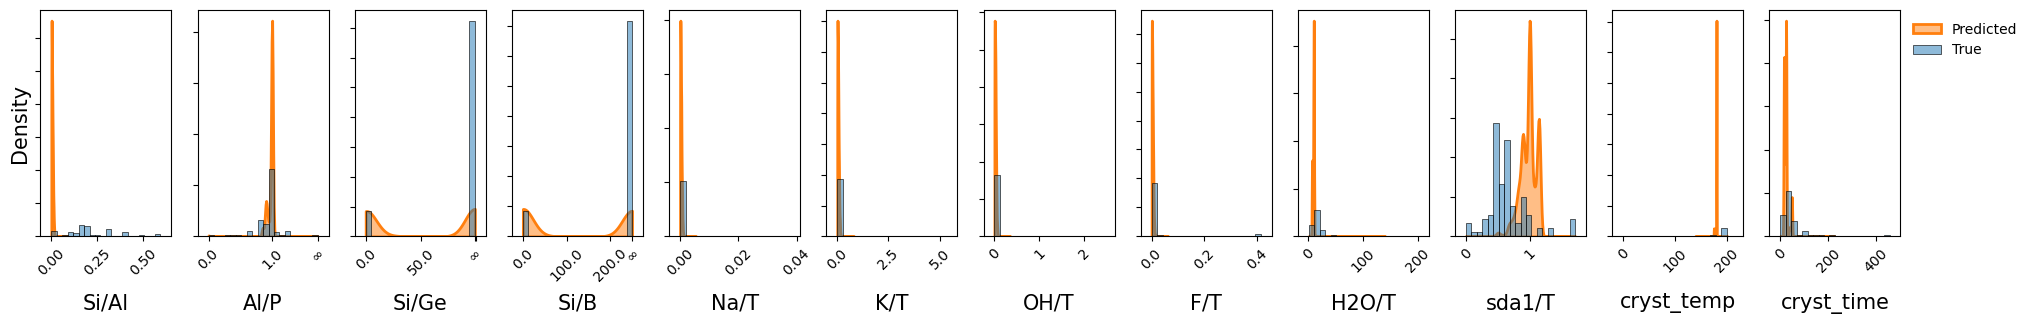

LTA C[N+](C)(C)C
MMD: 0.6679973602294922
WSD: 0.08517025090747929


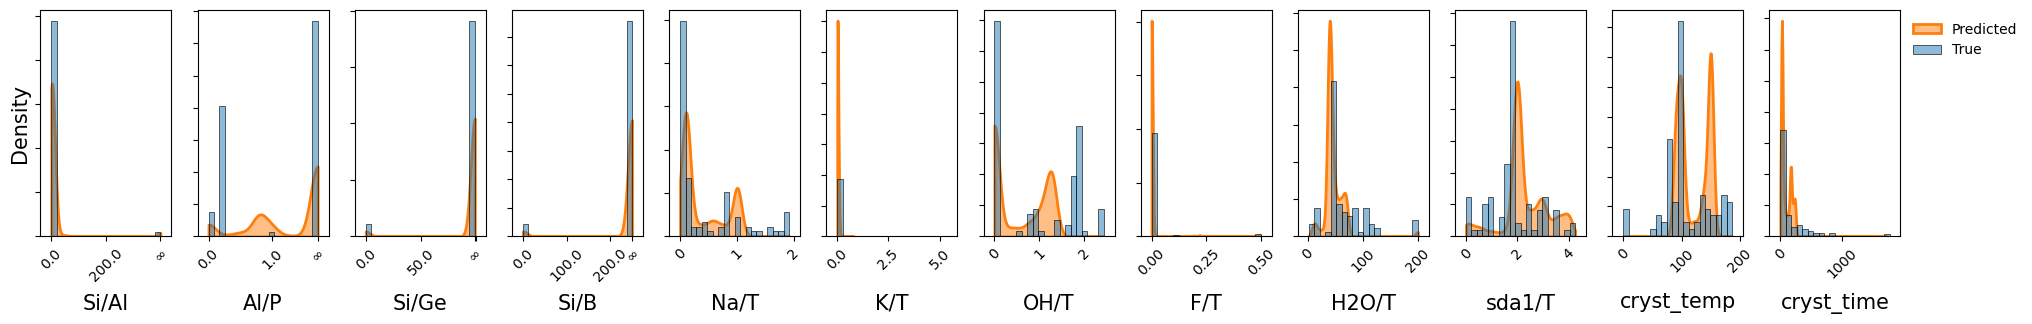

MEL CCCC[N+](CCCC)(CCCC)CCCC
MMD: 0.7827672958374023
WSD: 0.13347944560220473


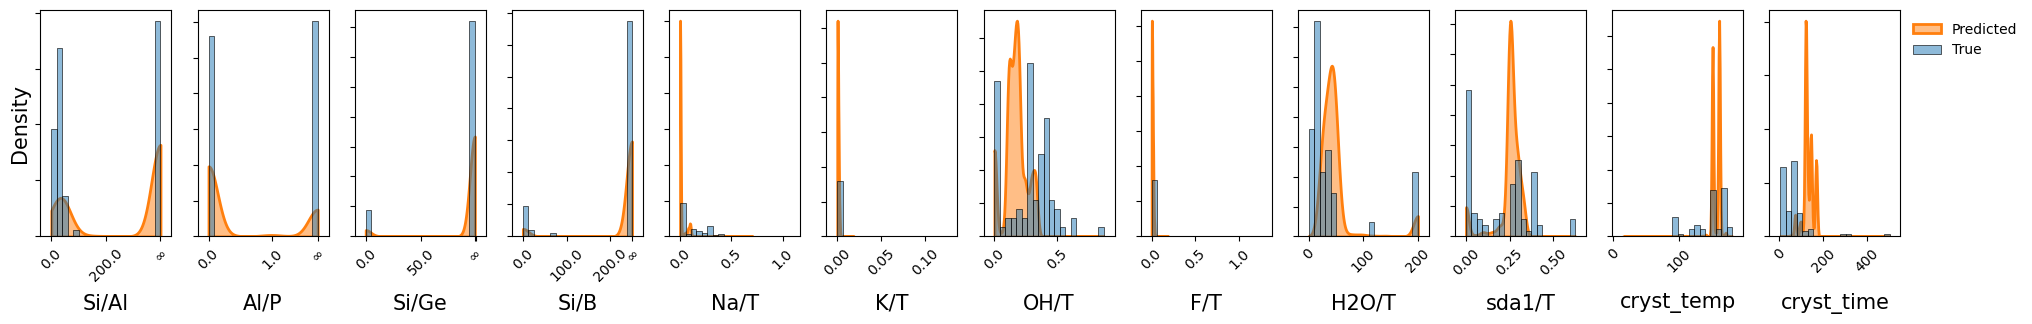

CHA C1COCCN1
MMD: 2.8503122329711914
WSD: 0.8611640917612436


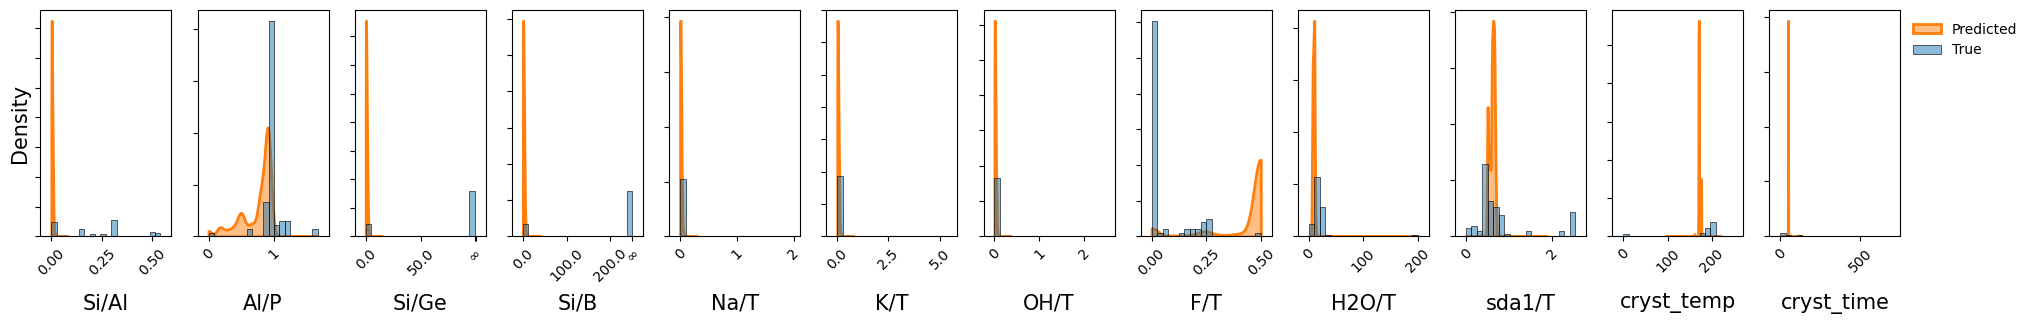

ATO CCCNCCC
MMD: 1.560288429260254
WSD: 0.04812833071120685


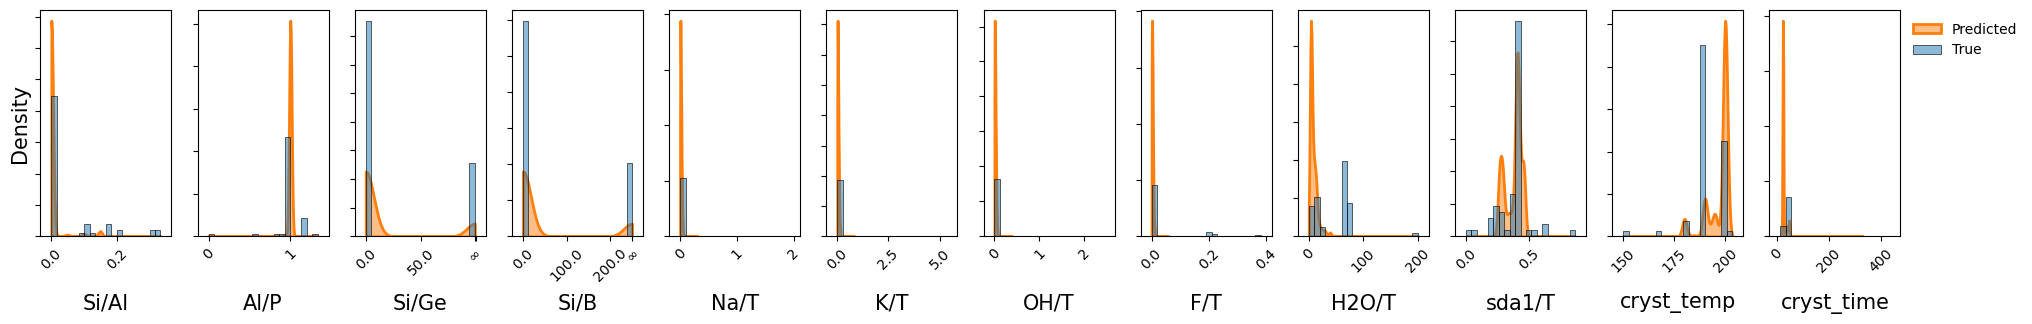

IWR C[N+](C)(C)CCCCCC[N+](C)(C)C
MMD: 1.107119083404541
WSD: 0.2945267025755411


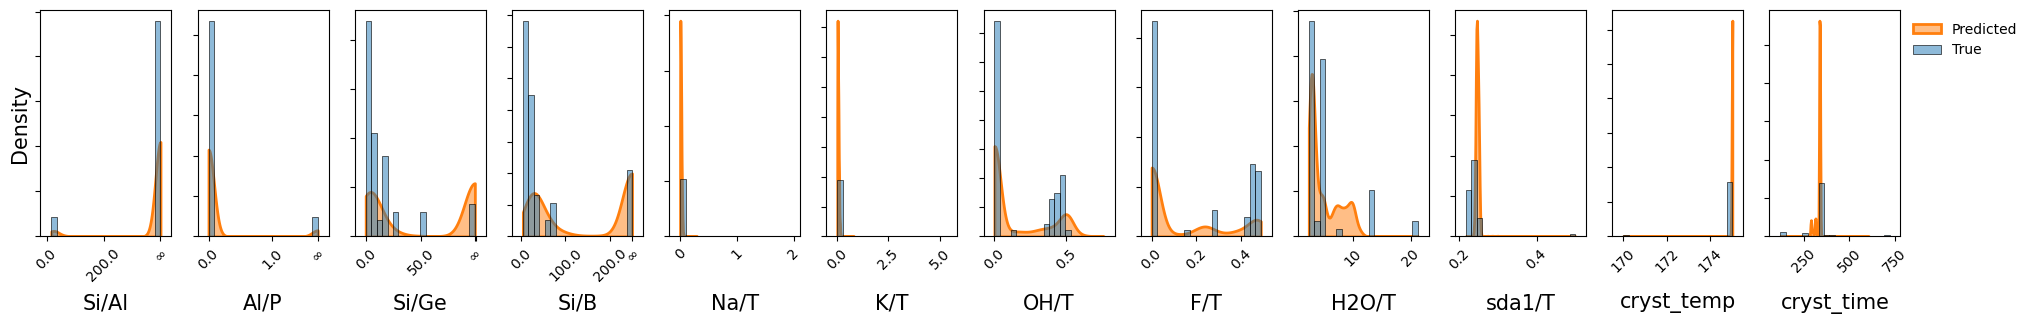

LTA C1COCCN2CCOCCOCCN(CCO1)CCOCCOCC2
MMD: 1.0133447647094727
WSD: 0.058099039257182516


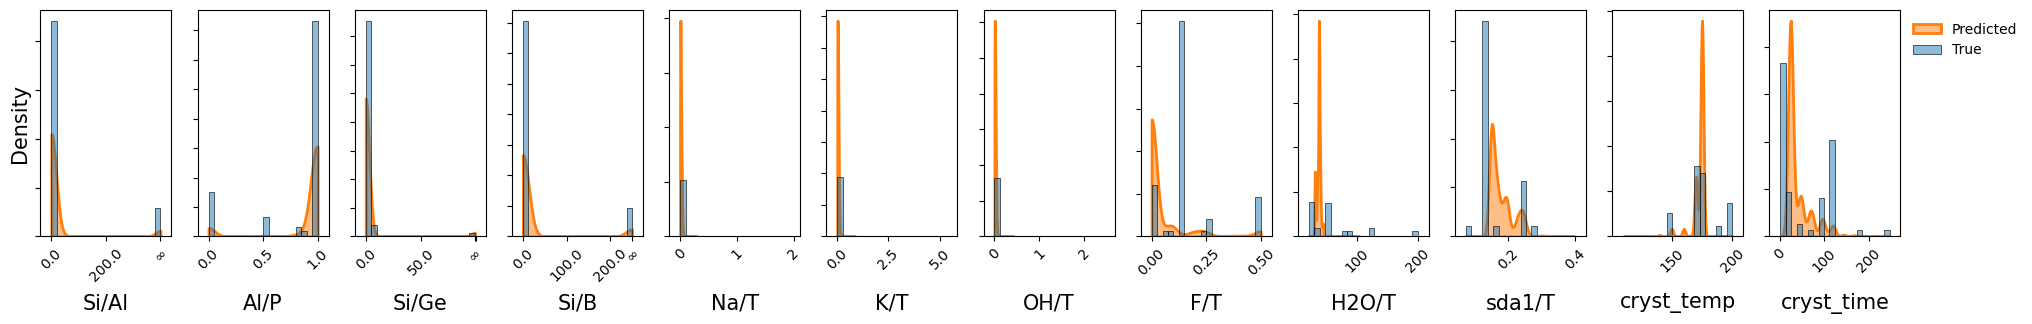

IMF C[N+]1(CCCCC[N+]2(C)CCCC2)CCCC1
MMD: 5.277106285095215
WSD: 1.5429847711671938


/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


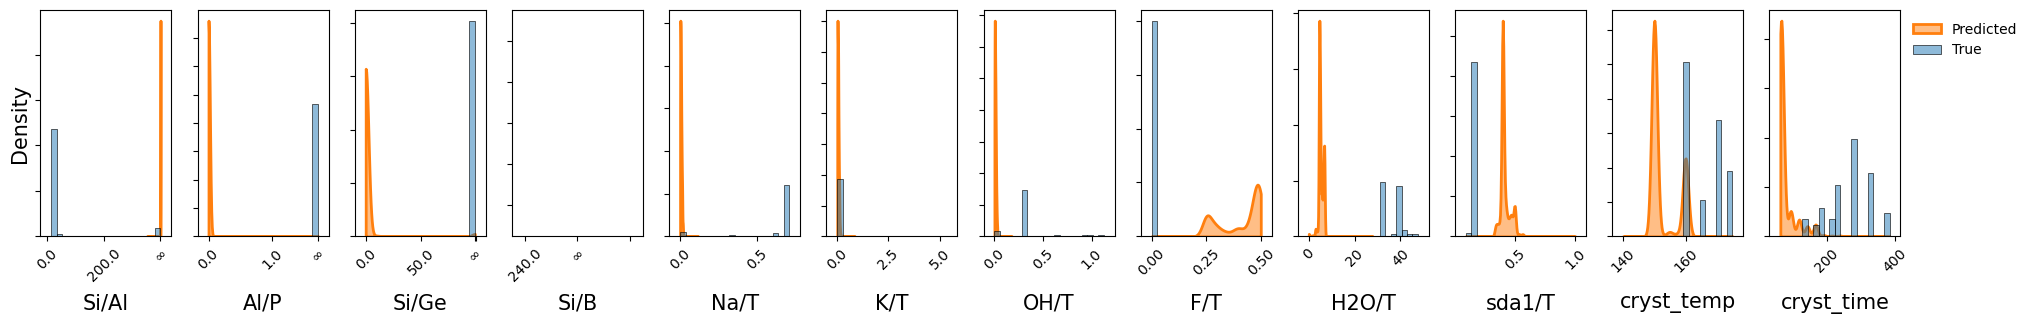

IWR CC[N+]1(CC)CC2C3C(C)=CC(C)(C2C1)C1C[N+](CC)(CC)CC31
MMD: 2.204080104827881
WSD: 0.6534635675462926


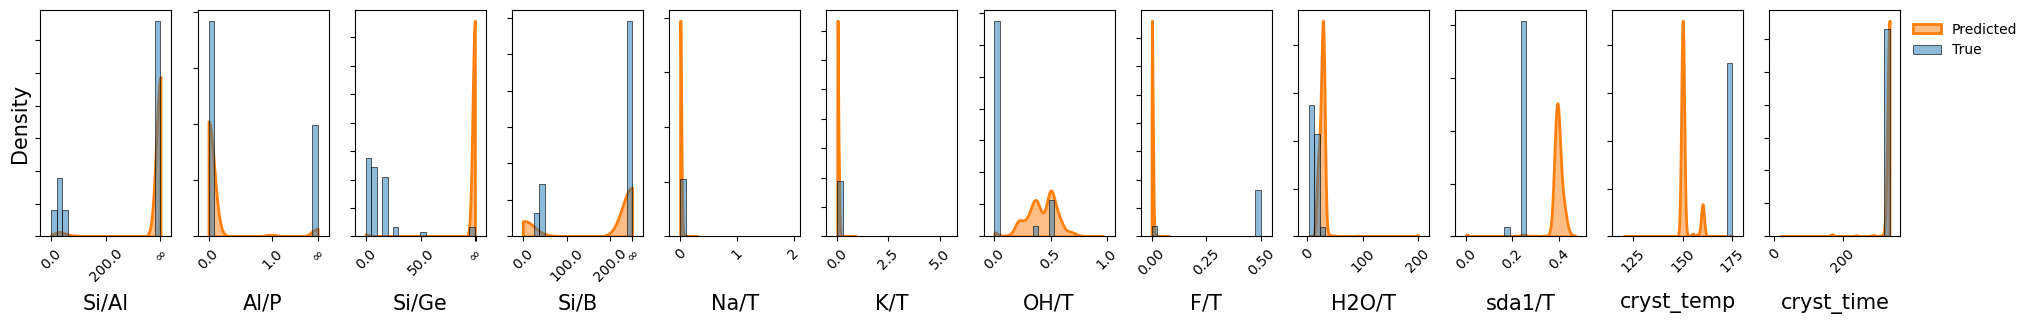

LEV C[N+]12CCC(CC1)CC2
MMD: 0.1530303955078125
WSD: 0.046369031693496474


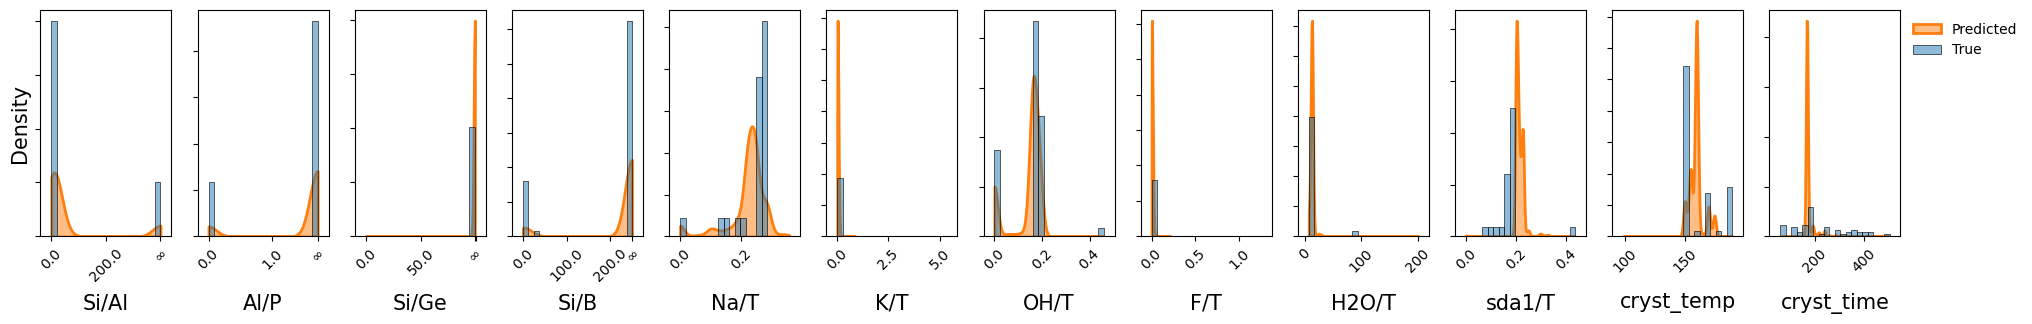

AFI CCCN(CCC)CCC
MMD: 0.5704488754272461
WSD: 0.034453044857000806


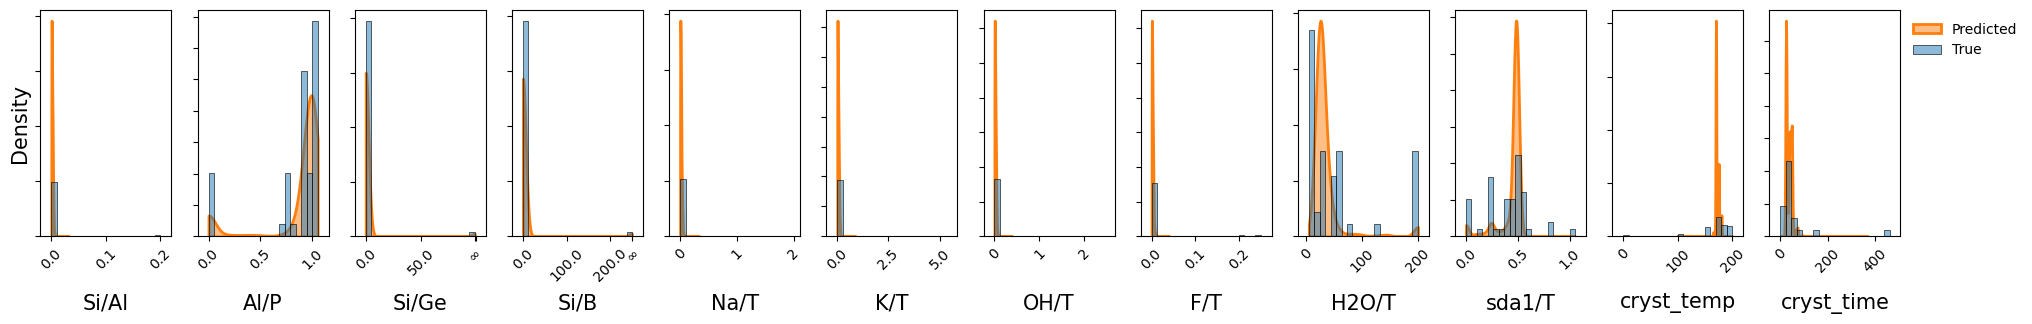

BEC C[N+](C)(C)CCCCCC[N+](C)(C)C
MMD: 0.3342132568359375
WSD: 0.11997719472894122


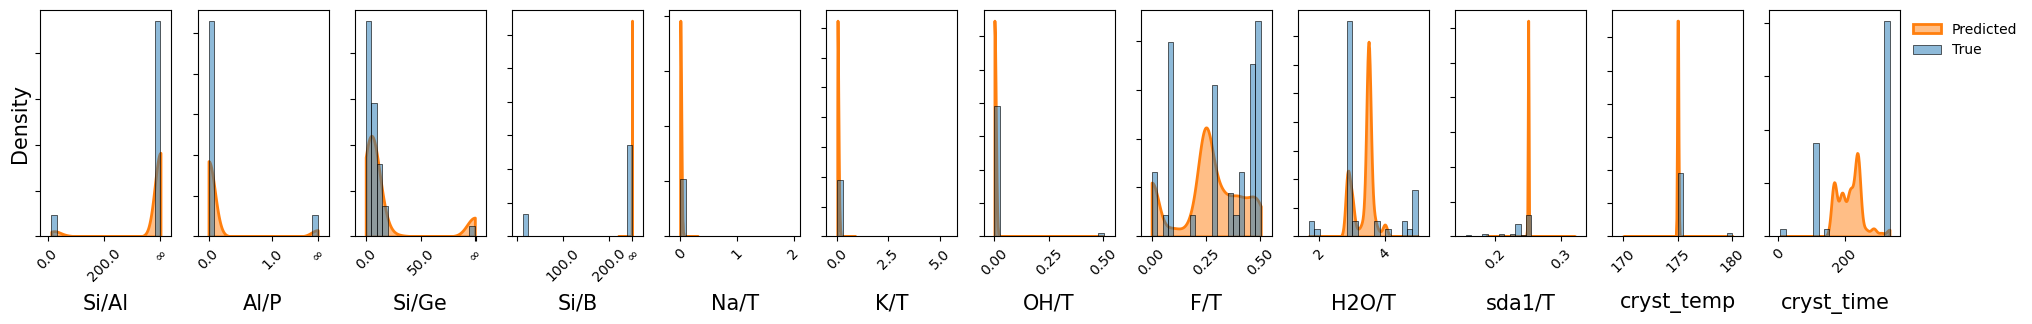

MAZ OSDA-free
MMD: 0.7113876342773438
WSD: 0.05963806218394837


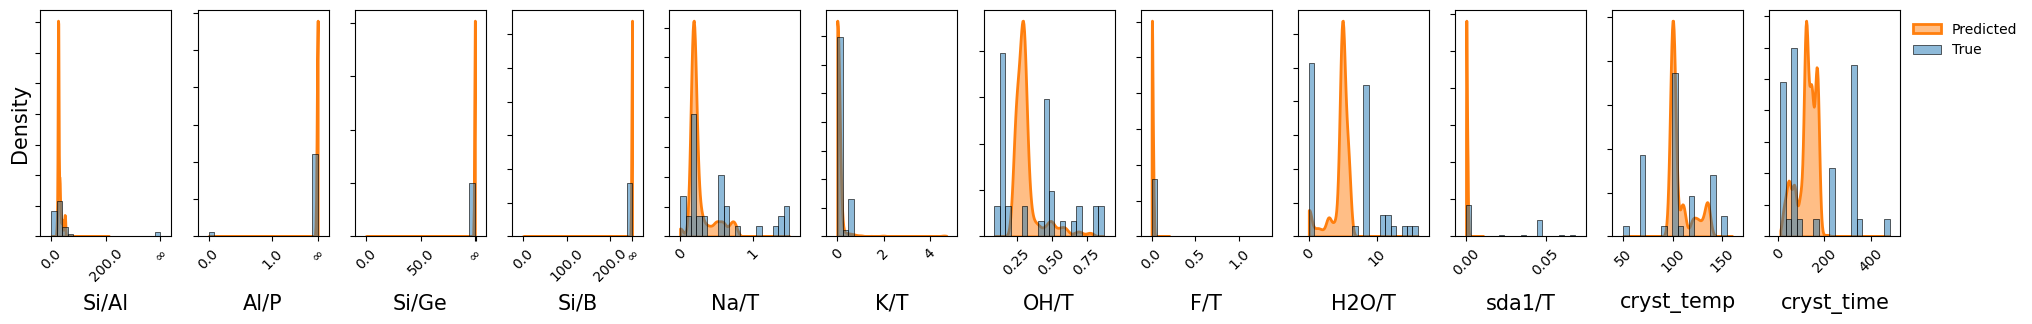

MWW C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 0.3859262466430664
WSD: 0.022983867665461434


AssertionError: the column name cryst_temp does not have user-defined bounds in the case of col_range == 0.0 for plt.xlim()

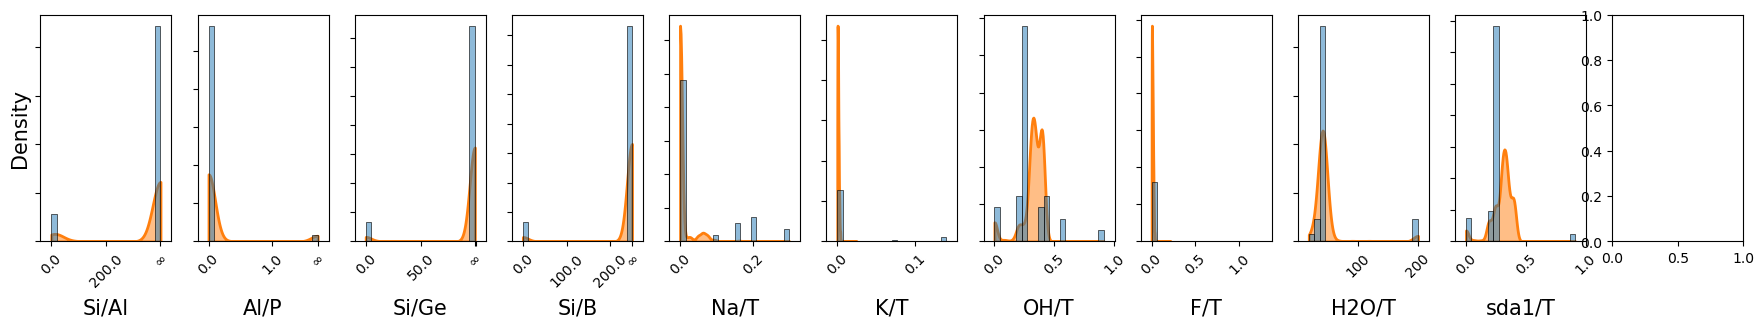

In [12]:
_, _ = eval_zeolite_osda(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs, eval=True, plot=True, print_metrics=True, num_systems=None)

CHA C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 2.127695083618164
WSD: 0.4150788964477474


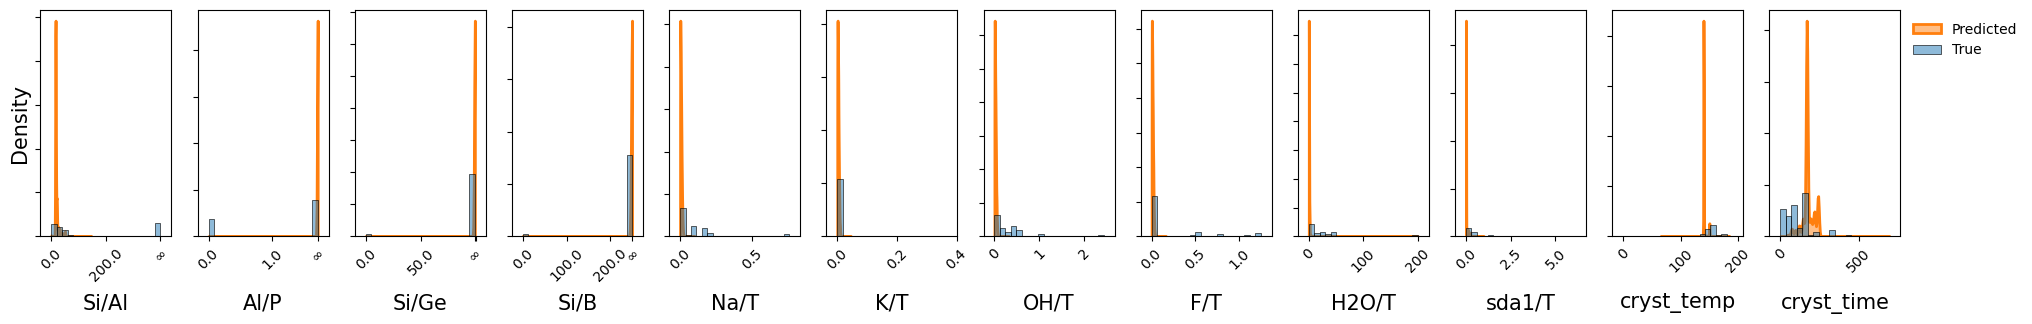

In [11]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='CHA', osda='C[N+](C)(C)C12CC3CC(CC(C3)C1)C2')